In [10]:
import gensim.models.doc2vec
from gensim.models import Doc2Vec
import gensim
import numpy as np

import multiprocessing
import multiprocessing

import gensim
import gensim.models.doc2vec
import numpy as np
from gensim.models import Doc2Vec

cores = multiprocessing.cpu_count()
assert gensim.models.doc2vec.FAST_VERSION > -1, "multi-threading"
print(cores)

%matplotlib notebook

8


* min_count: ignore all words with total frequency lower than this. You have to set this to 1, since the sentence labels only appear once. Setting it any higher than 1 will miss out on the sentences.

* window: the maximum distance between the current and predicted word within a sentence. Word2Vec uses a skip-gram model, and this is simply the window size of the skip-gram model.

* size: dimensionality of the feature vectors in output. 100 is a good number. If you're extreme, you can go up to around 400.

* sample: threshold for configuring which higher-frequency words are randomly downsampled

* workers: use this many worker threads to train the model

In [17]:
%%time


dataset = 'all'
doc_filepath = 'data/eos/ngram/bigram_transformed_reviews_'+dataset+'.txt'
doc2vec_model_path = 'data/eos/doc2vec_model.d2v'

def generate_doc2vec():
    sentences = gensim.models.doc2vec.TaggedLineDocument(doc_filepath)
    
    token_count = sum([len(sentence) for sentence in sentences])

    model = Doc2Vec(min_count=10, window=10, size=100, sample=1e-4, workers=7)  # use fixed learning rate
    
    model.build_vocab(sentences)
    
    print("done building vocab")
    
    for epoch in range(10):
        print("starting epoch")
        model.train(sentences, total_examples = token_count, epochs = model.iter)
        model.alpha -= 0.002  # decrease the learning rate
        model.min_alpha = model.alpha  # fix the learning rate, no decay
        print('Epoch took %.2f seconds to run.')
    
    model.save(doc2vec_model_path)

generate_doc2vec()

model = Doc2Vec.load(doc2vec_model_path)

done building vocab
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
starting epoch
Epoch took %.2f seconds to run.
CPU times: user 4h 52min 40s, sys: 6min 57s, total: 4h 59min 38s
Wall time: 1h 58min 47s


In [3]:
sims = model.docvecs.most_similar(99)
print(sims)

[(42294, 0.9555690288543701), (405630, 0.9540743231773376), (251762, 0.9223241209983826), (350445, 0.8946724534034729), (18186, 0.8740030527114868), (373999, 0.8677152395248413), (423759, 0.8674404621124268), (60482, 0.8643621206283569), (329956, 0.8545491695404053), (260416, 0.70215904712677)]


In [4]:
print(model.doesnt_match("iran turkey".split()))

turkey


In [6]:
print(model.most_similar(positive=['saudi', 'king'], negative=['syria']))

[('al_shehabi', 0.5053746104240417), ('kepada_pesakit', 0.45720088481903076), ('fachmagazin_nature', 0.4555472731590271), ('thinkers_dr.', 0.4555284082889557), ('communications_veröffentlicht', 0.44850945472717285), ('kingdom', 0.4483865797519684), ('wie_turi', 0.4482632279396057), ('noman_f', 0.445096492767334), ('يشتغلوا_بصنعه', 0.4411618411540985), ('mohammed', 0.44054847955703735)]


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
3D


<IPython.core.display.Javascript object>


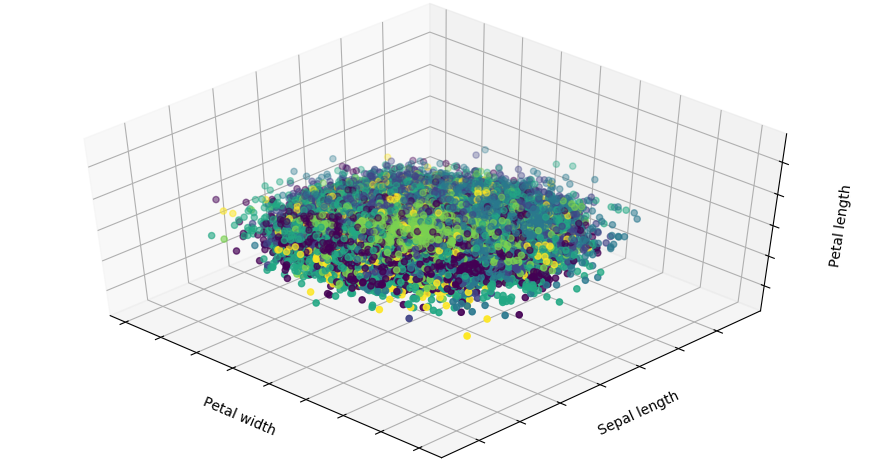

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


textVect = model.docvecs.doctag_syn0

## K-means ##
num_clusters = 6
km = KMeans(n_clusters=num_clusters)
km.fit(textVect)
clusters = km.labels_.tolist()

# print(clusters)
print(km)

# plt.scatter(textVect[:, 0], textVect[:, 1], c=clusters)
# plt.title("Distributed Blobs")


# 3D
print("3D")
fig = plt.figure("3d eos", figsize=(4, 3))
plt.clf()
labels = km.labels_
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(textVect[:, 0], textVect[:, 1], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')